# 따릉이

In [1]:
import pandas as pd #판다스 패키지

In [2]:
# 파일 읽기
train=pd.read_csv('/content/drive/MyDrive/따릉이/train.csv') #모델 학습 파일
test=pd.read_csv('/content/drive/MyDrive/따릉이/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/따릉이/submission.csv')#답안지 파일

# EDA

## 탐색적 자료분석 (어떤 데이터)

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


* preciptation : 비 정보. 비 안오면 0 비오면 1
* visibility : 시정, 시계
* count : 따릉이 대여수

- count 를 예측. (train을 바탕으로 test)


### 데이터 크기

In [6]:
print(train.shape)
print(test.shape) #count 열 없음
print(submission.shape) #test 셋의 count 값을 submission(답안지)에 

(1459, 11)
(715, 10)
(715, 2)


### 결측값 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


id hour (1459obs) 제외 결측치 존재

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


Id hour (715 obs) 

In [9]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [10]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


##### 시간별로 따릉이 대여량 평균

In [11]:
train.groupby('hour').mean()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [12]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [13]:
#시간대별 데이터 개수
train.groupby('hour').count()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,60,59,59,58,59,59,59,59,58,60
1,61,61,61,60,61,61,0,0,0,61
2,61,61,61,60,61,61,61,61,60,61
3,61,61,61,60,61,61,61,61,60,61
4,61,61,61,61,61,61,61,61,60,61
5,61,61,61,61,61,61,61,61,59,61
6,61,61,61,61,61,61,60,60,58,61
7,61,61,61,61,61,61,60,60,59,61
8,61,61,61,61,61,61,61,61,59,61


### 시각화

In [14]:
# 시각화
import matplotlib.pyplot as plt

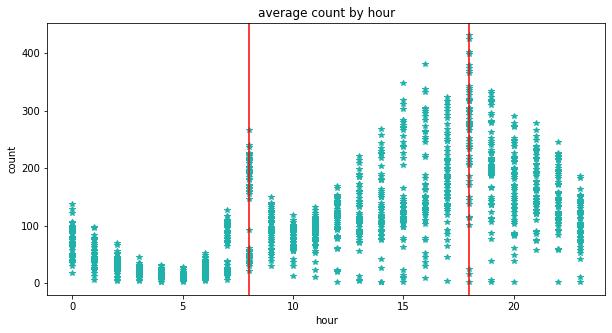

In [15]:
plt.figure(figsize=(10,5))
plt.plot(train['hour'],train['count'],'*',data=train,color='lightseagreen')

plt.title('average count by hour')
plt.xlabel('hour')
plt.ylabel('count')

plt.axvline(8,color='red') #vertical line
plt.axvline(18,color='red')

plt.show()

출근/등교시간이나 퇴근/하교시간에 많음

Text(18, 260, 'go home')

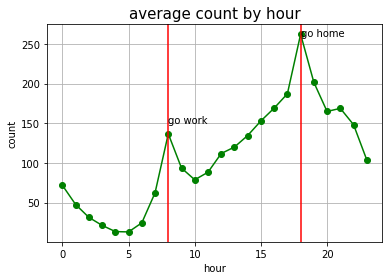

In [16]:
plt.plot(train.groupby('hour').mean()['count'],marker='o',color='g')
plt.grid()

#제목 축
plt.title('average count by hour',fontsize=15)
plt.xlabel('hour')
plt.ylabel('count')

#위에 원하는 선
plt.axvline(8,color='red') #vertical line
plt.axvline(18,color='red')

#원하는 텍스트
plt.text(8,150,'go work')
plt.text(18,260,'go home')

시간이 증가할수록 대여량 증가

변수간에 상관관계 표현 (상관계수)
* -1 ~ 1

In [17]:
#heatmap
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


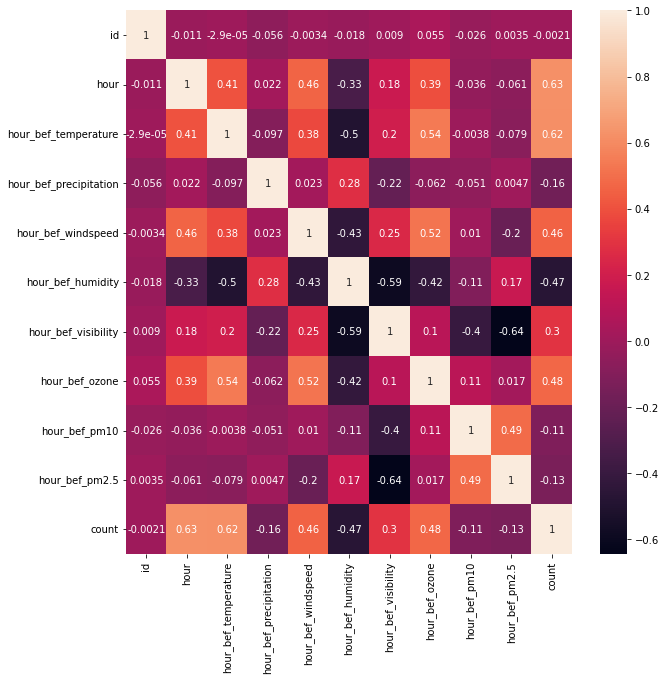

In [18]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train.corr(),annot=True)

count 상관계수 높은 hour, temp, windspeed 사용 + humidity & ozone


* 추가 몇몇 그래프


### 이상치 확인

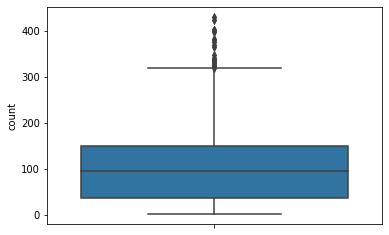

In [19]:
sns.boxplot(y='count',data=train)

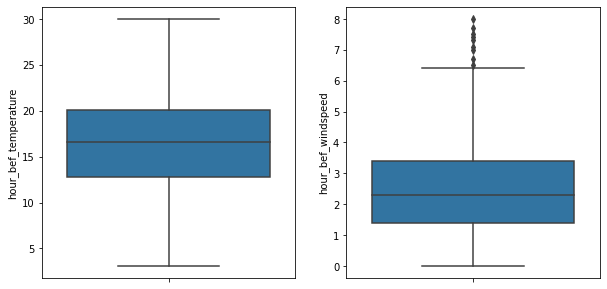

In [20]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_temperature',data=train,ax=ax1)
sns.boxplot(y='hour_bef_windspeed',data=train,ax=ax2)

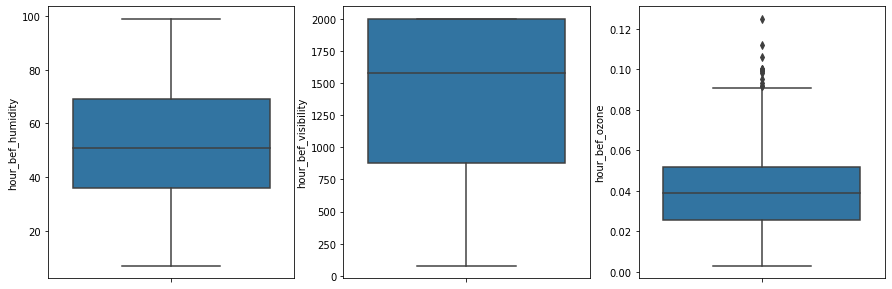

In [21]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.boxplot(y='hour_bef_humidity',data=train,ax=ax1)
sns.boxplot(y='hour_bef_visibility',data=train,ax=ax2)
sns.boxplot(y='hour_bef_ozone',data=train,ax=ax3)

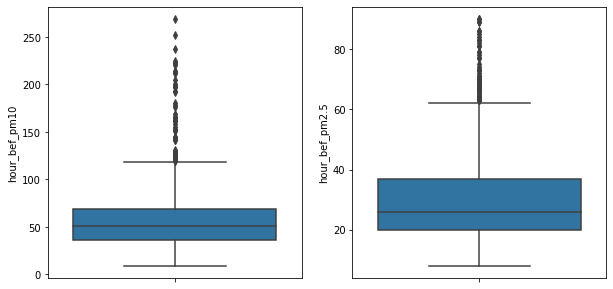

In [22]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_pm10',data=train,ax=ax1)
sns.boxplot(y='hour_bef_pm2.5',data=train,ax=ax2)

Text(0.4, 0.153, '0.151~')

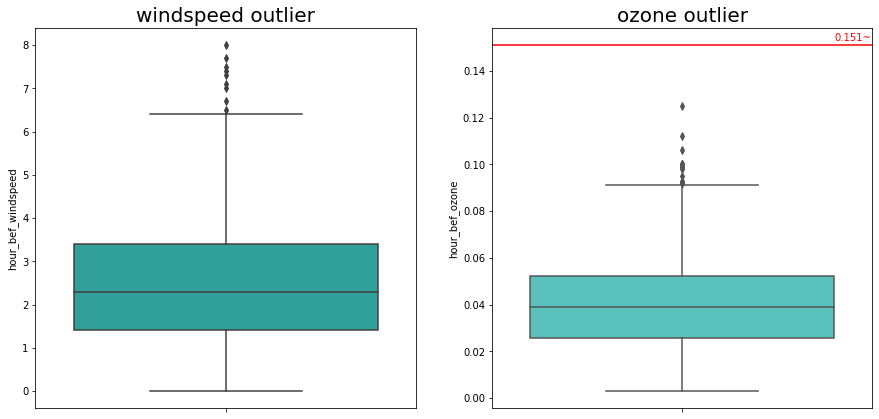

In [23]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(y='hour_bef_windspeed',data=train,ax=ax1,color='lightseagreen').set_title('windspeed outlier',fontsize=20)

sns.boxplot(y='hour_bef_ozone',data=train,ax=ax2,color='mediumturquoise').set_title('ozone outlier',fontsize=20)

plt.axhline(0.151,color='red')
plt.text(0.4,0.153,'0.151~',color='red')



Text(0.4, 77, '76~')

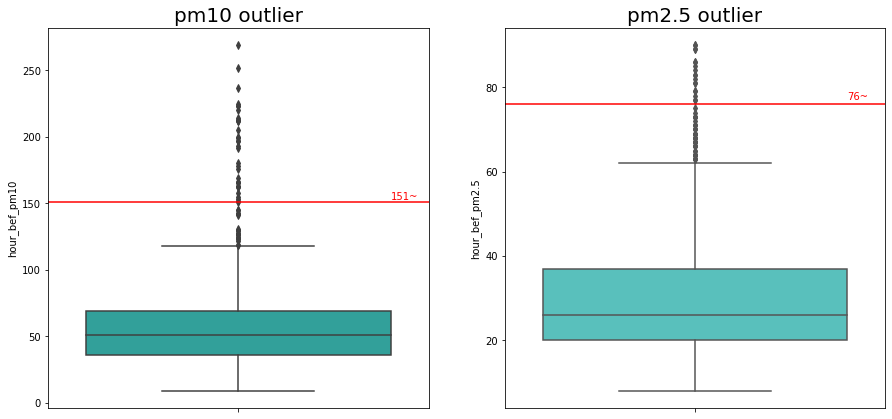

In [24]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)


sns.boxplot(y='hour_bef_pm10',data=train,ax=ax1,color='lightseagreen').set_title('pm10 outlier',fontsize=20)
plt.axhline(151,color='red')
plt.text(0.4,153,'151~',color='red')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y='hour_bef_pm2.5',data=train,ax=ax2,color='mediumturquoise').set_title('pm2.5 outlier',fontsize=20)
plt.axhline(76,color='red')
plt.text(0.4,77,'76~',color='red')


In [25]:
train[train['hour_bef_pm10']>200]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
49,83,6,11.0,0.0,1.3,25.0,1056.0,0.041,213.0,21.0,12.0
120,179,3,13.2,0.0,2.5,25.0,950.0,0.041,269.0,21.0,16.0
233,365,14,23.1,0.0,3.6,44.0,620.0,0.080,237.0,62.0,91.0
343,527,9,13.4,0.0,2.6,21.0,986.0,0.027,212.0,20.0,59.0
446,690,12,21.4,0.0,3.0,46.0,565.0,0.064,213.0,57.0,104.0
617,947,4,12.3,0.0,2.8,22.0,1082.0,0.042,223.0,20.0,16.0
653,1000,5,11.8,0.0,2.5,21.0,1014.0,0.042,205.0,18.0,6.0
680,1038,16,22.8,0.0,4.3,40.0,716.0,0.075,212.0,NaN,135.0
1061,1597,13,23.2,0.0,3.7,45.0,527.0,0.069,225.0,61.0,91.0
1263,1911,2,14.2,0.0,4.9,33.0,660.0,0.041,252.0,31.0,26.0


In [26]:
#outlier

def out(df=None,col=None):
  q1=df[col].quantile(q=0.25)
  q3=df[col].quantile(q=0.75)
  iqr=q3-q1

  low=-3*iqr+q1
  high=q3+3*iqr

  lowout = df[(df[col] < low)]
  highout = df[(df[col] > high)]
  print(lowout)
  print(highout)

In [27]:
out(train,'hour_bef_ozone')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []


In [28]:
out(train,'hour_bef_pm10')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
        id  hour  hour_bef_temperature  ...  hour_bef_pm10  hour_bef_pm2.5  count
20      35    10                  15.4  ...          199.0            18.0   58.0
49      83     6                  11.0  ...          213.0            21.0   12.0
62      97    21                  18.6  ...          178.0            37.0  139.0
120    179     3                  13.2  ...          269.0            21.0   16.0
183    280    11                  19.6  ...          193.0            54.0   66.0
233    365    14                  23.1  ...          237.0            62.0   91.0
234    366    17                  22.3  ...          200.0             NaN  151.0
280    437    20                  19.3  ...          176.0            39.0  123.0
343    527     9                  13.4  ...          212

In [29]:
out(train,'hour_bef_pm2.5')

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5, count]
Index: []
        id  hour  hour_bef_temperature  ...  hour_bef_pm10  hour_bef_pm2.5  count
428    666    12                  13.8  ...          104.0            89.0   82.0
511    787     4                  12.3  ...           96.0            90.0   14.0
1155  1743     8                  15.3  ...          142.0            89.0  163.0
1191  1796    13                  15.7  ...          105.0            90.0   75.0

[4 rows x 11 columns]


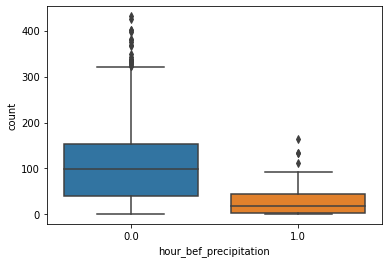

In [30]:
sns.boxplot(x='hour_bef_precipitation', y='count', data=train)
plt.show()

In [31]:
#비 여부에 따른 평균대여량
train.groupby('hour_bef_precipitation').mean()['count']

hour_bef_precipitation
0.0    111.130404
1.0     33.673913
Name: count, dtype: float64

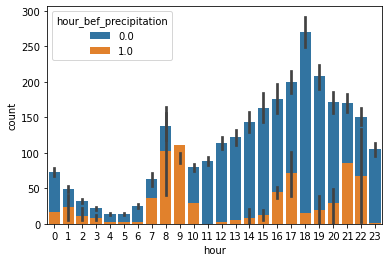

In [32]:
sns.barplot(x='hour', y='count', hue='hour_bef_precipitation', dodge=False, data=train) #dodge 누적
plt.show()

# 전처리

In [33]:
train1=train

In [34]:
train1.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### 결측치 처리

fillna() 함수로 결측치 대체

#### train dataset


##### temperature NA

In [35]:
train1[train1['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [36]:
tna = train1[train1['hour_bef_temperature'].isna()].index
tna

Int64Index([934, 1035], dtype='int64')

In [37]:
train1 = train1.drop(tna) #결측지 제거

In [38]:
train1[train1['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [39]:
#더미변수 생성
tdum = pd.get_dummies(train1['hour'])
train1 = train1.join(tdum.add_prefix('hour_'))
train1

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


##### windspeed NA

In [40]:
#풍속의 결측치 위치
train1[train1['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


상관계수가 높은 ozone 을 이용해 결측치 제거  
이때, 1시에서는 ozone값이 결측치 

In [41]:
#1시 경우에는 1시일때 windspeed의 median으로 대체
train1[train1['hour']==1]['hour_bef_windspeed'].median()

1.65

In [42]:
train1.loc[244,'hour_bef_windspeed']=1.65
train1.loc[244,]

id                         381.00
hour                         1.00
hour_bef_temperature        14.10
hour_bef_precipitation       0.00
hour_bef_windspeed           1.65
hour_bef_humidity           55.00
hour_bef_visibility       1992.00
hour_bef_ozone                NaN
hour_bef_pm10                 NaN
hour_bef_pm2.5                NaN
count                       38.00
hour_0                       0.00
hour_1                       1.00
hour_2                       0.00
hour_3                       0.00
hour_4                       0.00
hour_5                       0.00
hour_6                       0.00
hour_7                       0.00
hour_8                       0.00
hour_9                       0.00
hour_10                      0.00
hour_11                      0.00
hour_12                      0.00
hour_13                      0.00
hour_14                      0.00
hour_15                      0.00
hour_16                      0.00
hour_17                      0.00
hour_18       

In [43]:
train1[train1['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'windspeed')

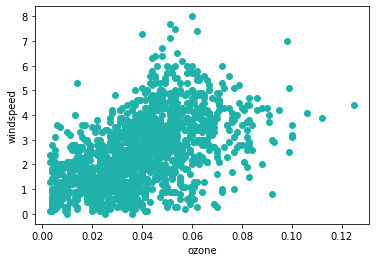

In [44]:
#ozone 을 통해 windspeed 결측치
plt.scatter(x='hour_bef_ozone',y='hour_bef_windspeed',data=train1,color='lightseagreen')
plt.xlabel('ozone')
plt.ylabel('windspeed')

In [45]:
train1.groupby('hour_bef_ozone')['hour_bef_windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
hour_bef_ozone,,,,,,,,
0.003,4.0,1.475000,1.027538,0.1,1.000,1.7,2.175,2.4
0.004,20.0,1.145000,0.747258,0.1,0.475,1.0,1.725,2.8
0.005,17.0,1.335294,0.831370,0.2,0.800,1.0,1.800,3.1
0.006,16.0,1.162500,0.814760,0.3,0.600,0.9,1.700,3.6
0.007,11.0,1.400000,0.869483,0.4,0.900,1.3,1.650,3.5
...,...,...,...,...,...,...,...,...
0.099,2.0,3.800000,1.838478,2.5,3.150,3.8,4.450,5.1
0.100,3.0,3.300000,0.264575,3.1,3.150,3.2,3.400,3.6
0.106,1.0,4.100000,NaN,4.1,4.100,4.1,4.100,4.1


In [46]:
train1.groupby('hour_bef_ozone')['hour_bef_windspeed'].median().isna().sum()

0

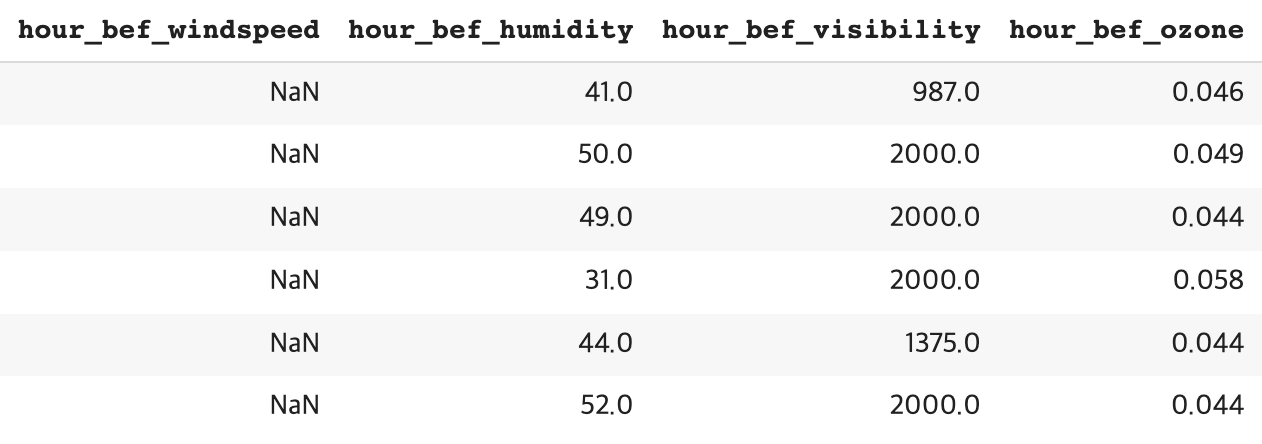

In [47]:
train1[train1['hour_bef_ozone']==0.046]['hour_bef_windspeed'].describe()

count    17.000000
mean      3.358824
std       1.212466
min       1.400000
25%       2.800000
50%       3.200000
75%       4.200000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [48]:
train1[train1['hour_bef_ozone']==0.049]['hour_bef_windspeed'].describe()

count    28.000000
mean      2.642857
std       1.499735
min       0.500000
25%       1.375000
50%       2.500000
75%       3.400000
max       5.500000
Name: hour_bef_windspeed, dtype: float64

In [49]:
train1[train1['hour_bef_ozone']==0.058]['hour_bef_windspeed'].describe()

count    14.000000
mean      3.871429
std       1.478267
min       0.600000
25%       3.175000
50%       3.900000
75%       4.800000
max       6.000000
Name: hour_bef_windspeed, dtype: float64

In [50]:
train1[train1['hour_bef_ozone']==0.044]['hour_bef_windspeed'].describe()

count    29.000000
mean      3.682759
std       1.194950
min       1.000000
25%       3.100000
50%       3.500000
75%       4.500000
max       6.300000
Name: hour_bef_windspeed, dtype: float64

In [51]:
train1[train1['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#1시가 아닌 windspeed 결측치 - ozone 별로 나누어 median으로 대체
train1['hour_bef_windspeed'].fillna({18:3.2,260:2.5,376:3.5, 780:3.9 ,1138:3.5,1229:3.5}, inplace=True)

In [53]:
train1.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
hour_0                      0
hour_1                      0
hour_2                      0
hour_3                      0
hour_4                      0
hour_5                      0
hour_6                      0
hour_7                      0
hour_8                      0
hour_9                      0
hour_10                     0
hour_11                     0
hour_12                     0
hour_13                     0
hour_14                     0
hour_15                     0
hour_16                     0
hour_17                     0
hour_18                     0
hour_19                     0
hour_20                     0
hour_21                     0
hour_22   

##### ozone NA

In [54]:
#ozone 결측치 확인
train1[train1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
train1.groupby('hour')['hour_bef_ozone'].describe()
#1시 일때 모두 NAN

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,59.0,0.033763,0.016296,0.003,0.02250,0.0350,0.04250,0.074
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,0.030492,0.016567,0.003,0.01800,0.0310,0.03900,0.083
3,61.0,0.031213,0.017270,0.003,0.01800,0.0340,0.04100,0.082
4,61.0,0.031984,0.016320,0.004,0.02000,0.0330,0.04100,0.081
5,61.0,0.031623,0.015445,0.004,0.02200,0.0320,0.04000,0.077
6,60.0,0.029317,0.014817,0.004,0.02000,0.0295,0.03900,0.069
7,60.0,0.025300,0.014314,0.003,0.01475,0.0250,0.03325,0.062
8,61.0,0.021197,0.012415,0.004,0.01200,0.0210,0.02800,0.061


Text(0, 0.5, 'mean ozone')

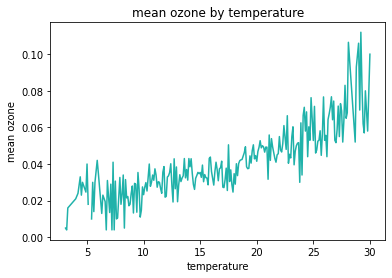

In [56]:
plt.plot(train1.groupby('hour_bef_temperature')['hour_bef_ozone'].mean(),color='lightseagreen')
plt.title('mean ozone by temperature')
plt.xlabel('temperature')
plt.ylabel('mean ozone')
#온도별 평균 ozone

Text(0, 0.5, 'ozone')

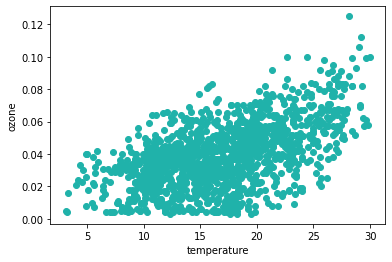

In [57]:
plt.scatter(x='hour_bef_temperature',y='hour_bef_ozone',data=train1,color='lightseagreen')

plt.xlabel('temperature')
plt.ylabel('ozone')

In [58]:
train1.groupby('hour_bef_temperature')['hour_bef_ozone'].mean() #온도에 따른 ozone

hour_bef_temperature
3.1     0.005
3.2     0.004
3.3     0.016
4.0     0.021
4.2     0.024
        ...  
29.4    0.062
29.5    0.057
29.6    0.080
29.8    0.058
30.0    0.100
Name: hour_bef_ozone, Length: 245, dtype: float64

In [59]:
train1['hour_bef_temperature'].describe()

count    1457.000000
mean       16.717433
std         5.239150
min         3.100000
25%        12.800000
50%        16.600000
75%        20.100000
max        30.000000
Name: hour_bef_temperature, dtype: float64

In [60]:
#구간별 온도와 평균 오존농도
tempoz={}
for x in range(3, 31, 1): #구간은 1도 씩 끊음.
    start = x
    end = x+1
    temp = train1[(train1["hour_bef_temperature"] >= start) & (train1["hour_bef_temperature"] < end)]
    tempoz[start]= temp["hour_bef_ozone"].mean()


#결측치 구간온도별 오존평균값으로 대체하는 반복문 작성
for i in train1[train1['hour_bef_ozone'].isna()].index:
  a=train1.loc[i,'hour_bef_temperature']
  aa=a//1 
  #print(aa,tempoz[aa])
  train1['hour_bef_ozone'].fillna({i:tempoz[aa]},inplace=True)
  

In [61]:
train1[train1['hour_bef_ozone'].isna()] #결측치 제거

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


##### PM10 PM2.5 NA
pm10 pm2.5 미세먼지 - visibility 로 결측치 대체

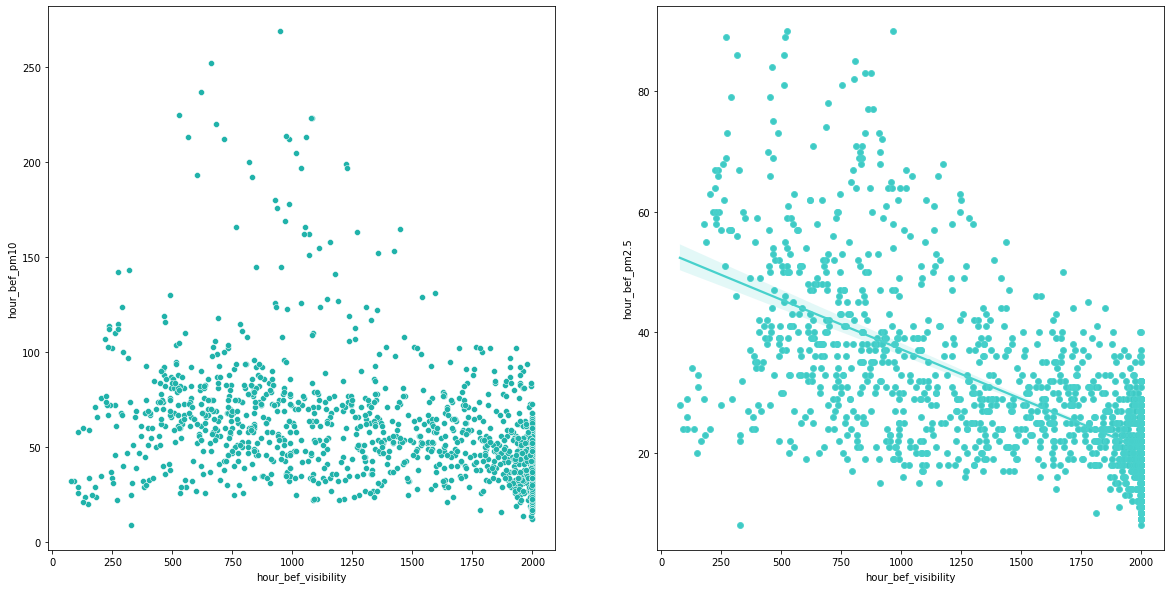

In [62]:
#pm - visibility
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.scatterplot(x='hour_bef_visibility', y='hour_bef_pm10', data=train1,ax=ax1,color='lightseagreen')
sns.scatterplot(x='hour_bef_visibility', y='hour_bef_pm2.5', data=train1,ax=ax2,color='lightseagreen')
sns.regplot(x='hour_bef_visibility', y='hour_bef_pm2.5', data=train1, fit_reg=True,ax=ax2,color='mediumturquoise')


In [63]:
train1[train1['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
14,28,1,20.0,0.0,1.8,58.0,2000.0,0.048357,NaN,NaN,74.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,78,1,12.2,0.0,3.0,49.0,1071.0,0.033187,NaN,NaN,36.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,130,1,9.4,0.0,2.5,65.0,1907.0,0.025082,NaN,NaN,39.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,149,16,15.8,0.0,5.3,17.0,1923.0,0.047000,NaN,NaN,102.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
129,193,19,27.0,0.0,3.6,39.0,2000.0,0.047000,NaN,NaN,319.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,0.030774,NaN,NaN,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1338,2016,19,16.2,0.0,3.5,31.0,950.0,0.060000,NaN,NaN,167.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,0.033187,NaN,NaN,43.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,0.030833,NaN,NaN,42.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
print(train1['hour_bef_visibility'].describe())
print()
print(train1['hour_bef_pm10'].describe())
print()
print(train1['hour_bef_pm2.5'].describe())

#outlier 있음 - mean 보다는 median 으로 대체

count    1457.000000
mean     1405.216884
std       583.131708
min        78.000000
25%       879.000000
50%      1577.000000
75%      1994.000000
max      2000.000000
Name: hour_bef_visibility, dtype: float64

count    1369.000000
mean       57.168736
std        31.771019
min         9.000000
25%        36.000000
50%        51.000000
75%        69.000000
max       269.000000
Name: hour_bef_pm10, dtype: float64

count    1342.000000
mean       30.327124
std        14.713252
min         8.000000
25%        20.000000
50%        26.000000
75%        37.000000
max        90.000000
Name: hour_bef_pm2.5, dtype: float64


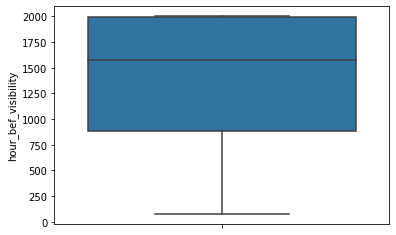

In [65]:
sns.boxplot(y='hour_bef_visibility',data=train1)

In [66]:
#visibility 구간 나누기

tempv10={}
tempv25={}
for x in range(0, 2001 , 100): #100씩 나눈다
    start = x
    end = x+100

    #0이상 100미만

    tempp = train1[(train1["hour_bef_visibility"] >= start) & (train1["hour_bef_visibility"] < end)]
    tempv10[start]= tempp["hour_bef_pm10"].median()
    tempv25[start]= tempp["hour_bef_pm2.5"].median()


#pm결측치 구간visibility별 미세먼지 median 값으로 대체하는 반복문 작성
for i in train1[train1['hour_bef_pm10'].isna()].index:
  b = train1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  train1['hour_bef_pm10'].fillna( {i:tempv10[bb]},inplace=True )

for i in train1[train1['hour_bef_pm2.5'].isna()].index:
  b = train1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  train1['hour_bef_pm2.5'].fillna( {i:tempv25[bb]},inplace=True )



In [67]:
train1[train1['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


In [68]:
train1.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
dtype: int64

na 없음. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


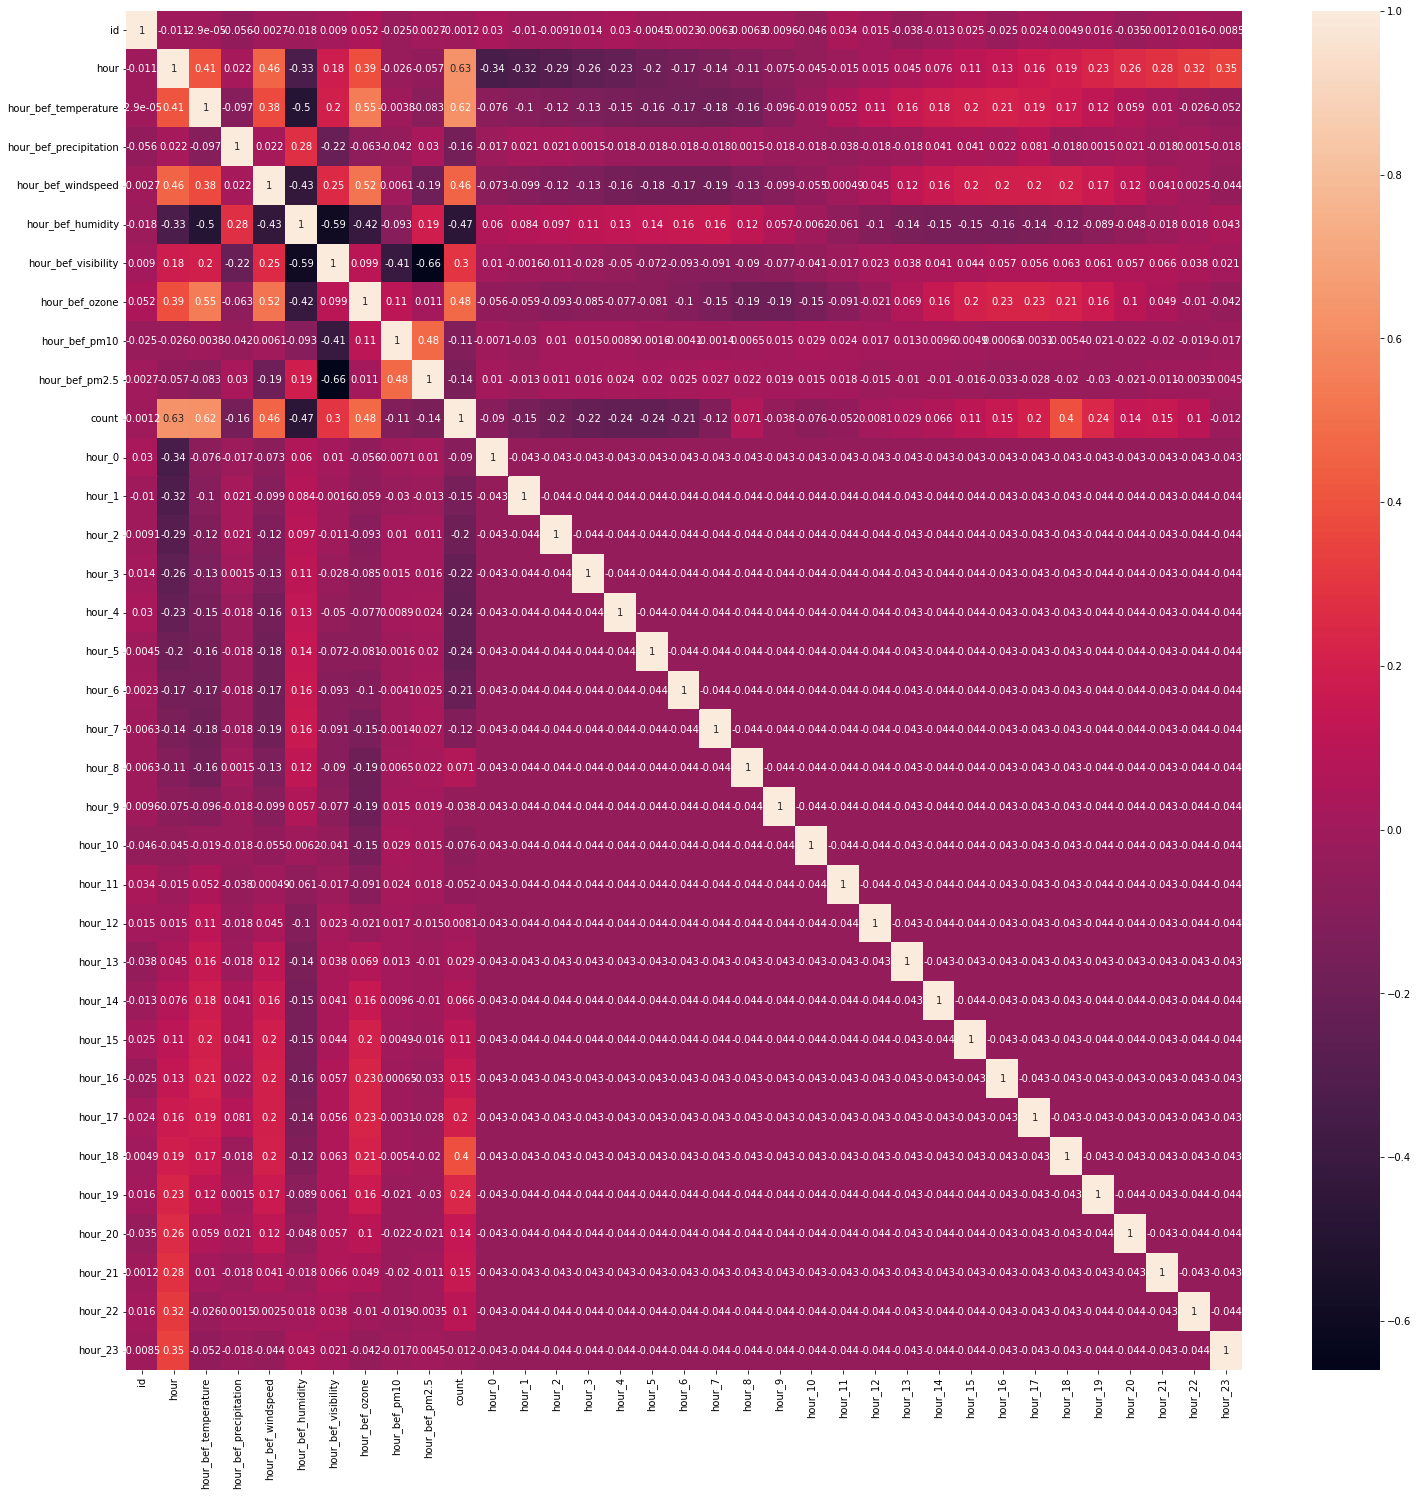

In [69]:
plt.figure(figsize=(25,25))

mask = np.zeros_like(train1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

sns.heatmap(train1.corr(),annot=True)

#### test dataset

In [70]:
test.isna().sum() 
#test의 결측치도 대체하기

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [71]:
test1=test

In [72]:
#더미변수 생성
tedum = pd.get_dummies(test1['hour'])
test1 = test1.join(tedum.add_prefix('hour_'))
test1

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
test1.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
dtype: int64

##### temperature NA

In [74]:
test1[test1['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
train1[train1['hour_19']==1].describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,61.000000,61.0,61.000000,61.000000,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0
mean,1153.147541,19.0,19.704918,0.032787,3.595082,43.57377,1576.688525,0.053967,53.770492,28.327869,201.606557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,632.276254,0.0,4.605664,0.179556,1.153173,19.66084,523.652542,0.015620,26.547061,13.008614,75.977689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,55.000000,19.0,10.600000,0.000000,0.700000,8.00000,250.000000,0.022000,17.000000,10.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,601.000000,19.0,16.600000,0.000000,3.000000,29.00000,1222.000000,0.043000,36.000000,19.000000,150.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,1088.000000,19.0,19.400000,0.000000,3.700000,40.00000,1942.000000,0.053000,49.000000,25.000000,204.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,1699.000000,19.0,23.500000,0.000000,4.300000,53.00000,2000.000000,0.062000,67.000000,37.000000,244.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,2168.000000,19.0,28.700000,1.000000,7.000000,92.00000,2000.000000,0.100000,180.000000,62.000000,335.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
#전부 결측치인 경우 19시 median 값들로 대체
train1[train1['hour']==19]['hour_bef_ozone'].median()

0.053

In [77]:
for a in ['hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']:
  test1.loc[653,a]=train1[train1['hour']==19][a].median()

test1.loc[653]

id                        1943.000
hour                        19.000
hour_bef_temperature        19.400
hour_bef_precipitation       0.000
hour_bef_windspeed           3.700
hour_bef_humidity           40.000
hour_bef_visibility       1942.000
hour_bef_ozone               0.053
hour_bef_pm10               49.000
hour_bef_pm2.5              25.000
hour_0                       0.000
hour_1                       0.000
hour_2                       0.000
hour_3                       0.000
hour_4                       0.000
hour_5                       0.000
hour_6                       0.000
hour_7                       0.000
hour_8                       0.000
hour_9                       0.000
hour_10                      0.000
hour_11                      0.000
hour_12                      0.000
hour_13                      0.000
hour_14                      0.000
hour_15                      0.000
hour_16                      0.000
hour_17                      0.000
hour_18             

In [78]:
test1.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            34
hour_bef_pm10             36
hour_bef_pm2.5            35
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
dtype: int64

##### ozone NA

In [79]:
#ozone
test1[test1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
32,82,1,22.8,0.0,2.4,52.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,115,1,21.5,1.0,0.5,90.0,347.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,147,1,22.8,0.0,1.2,57.0,1190.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,260,1,20.0,0.0,2.0,65.0,1662.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,270,1,20.0,0.0,1.7,31.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,297,1,15.1,1.0,2.2,98.0,224.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,323,1,18.7,0.0,1.4,41.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,352,1,19.2,0.0,1.4,80.0,1085.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129,358,1,23.6,0.0,0.9,83.0,466.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
209,609,1,18.6,0.0,2.4,37.0,2000.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
#구간별 평균 온도와 평균오존농도

tempoz={}
for x in range(3, 31, 1):
    start = x
    end = x+1
    temp = train1[(train1["hour_bef_temperature"] >= start) & (train1["hour_bef_temperature"] < end)]
    tempoz[start]= temp["hour_bef_ozone"].mean()


#결측치 구간온도별 오존평균값으로 대체하는 반복문 작성
for i in test1[test1['hour_bef_ozone'].isna()].index:
  a=test1.loc[i,'hour_bef_temperature']
  aa=a//1 
  test1['hour_bef_ozone'].fillna({i:tempoz[aa]},inplace=True)

In [81]:
test1[test1['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


##### PM10 PM2.5 NA

In [82]:
test1[test1['hour_bef_pm10'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
18,42,18,29.4,0.0,3.3,43.0,1685.0,0.055000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
32,82,1,22.8,0.0,2.4,52.0,2000.0,0.050830,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,115,1,21.5,1.0,0.5,90.0,347.0,0.047054,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,147,1,22.8,0.0,1.2,57.0,1190.0,0.050830,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,260,1,20.0,0.0,2.0,65.0,1662.0,0.048357,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,270,1,20.0,0.0,1.7,31.0,2000.0,0.048357,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,297,1,15.1,1.0,2.2,98.0,224.0,0.034958,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,323,1,18.7,0.0,1.4,41.0,2000.0,0.039660,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,352,1,19.2,0.0,1.4,80.0,1085.0,0.043236,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128,356,15,25.5,0.0,3.6,40.0,1404.0,0.077000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [83]:
#visibility 구간 나누기

tempv10={}
tempv25={}
for x in range(0, 2001 , 100):
    start = x
    end = x+100

    #0이상 100미만

    tempp = train1[(train1["hour_bef_visibility"] >= start) & (train1["hour_bef_visibility"] < end)]
    tempv10[start]= tempp["hour_bef_pm10"].median()
    tempv25[start]= tempp["hour_bef_pm2.5"].median()


#pm결측치 구간visibility별 미세먼지 median 값으로 대체하는 반복문 작성
for i in test1[test1['hour_bef_pm10'].isna()].index:
  b = test1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  test1['hour_bef_pm10'].fillna( {i:tempv10[bb]},inplace=True )

for i in test1[test1['hour_bef_pm2.5'].isna()].index:
  b = test1.loc[i,'hour_bef_visibility']
  bb = (b//100)*100
  test1['hour_bef_pm2.5'].fillna( {i:tempv25[bb]},inplace=True )



In [84]:
test1.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
dtype: int64

# Random forest

random forest 의 옵션 (ctrl+shift)

n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

- n_estimators : n개의 나무들로 학습. 200,300 바꿀 수도 있음
- n_jobs : cpu 개수. n_jobs=-1 하면 cpu 모두 
- max_depth : 나무의 깊이. overfitting 방지.

# 모델링

## train - train / test split

In [87]:

features=['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

X=train1[features]
y=train1['count']


#train 을 train/test로 분리
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test= train_test_split(X,y, test_size=0.2)


In [88]:
print(X_train.shape)
print(X_test.shape)

(1165, 9)
(292, 9)


In [89]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [90]:
rg = RandomForestRegressor()
param={'min_samples_split': [2,5,10],
       'min_samples_leaf':[1,2,4],
        'max_depth': range(10,16),
        'n_estimators': [100,200,300,400],
       'criterion':['mae','mse']}


In [91]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(model, param_grid = param, cv = 3)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:4

최적 하이퍼 파라미터:  {'criterion': 'mse', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.7747


In [92]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.902109,0.027096,0.013003,0.000346,mae,10,1,2,100,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.766961,0.771993,0.750254,0.763069,0.009292,254
1,3.830914,0.014131,0.025999,0.001625,mae,10,1,2,200,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.774817,0.770383,0.748422,0.764540,0.011540,197
2,5.739145,0.015910,0.036810,0.001260,mae,10,1,2,300,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.773949,0.774891,0.746741,0.765194,0.013054,162
3,7.908348,0.414575,0.047285,0.000624,mae,10,1,2,400,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.770374,0.772957,0.750571,0.764634,0.010000,190
4,1.877468,0.008945,0.013089,0.000072,mae,10,1,5,100,"{'criterion': 'mae', 'max_depth': 10, 'min_sam...",0.776296,0.772786,0.743802,0.764295,0.014561,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1.145095,0.013170,0.045824,0.000803,mse,15,4,5,400,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.776304,0.779508,0.741128,0.765647,0.017387,146
428,0.281830,0.002439,0.012969,0.000470,mse,15,4,10,100,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.778258,0.770400,0.744730,0.764462,0.014317,200
429,0.553512,0.005407,0.024143,0.001195,mse,15,4,10,200,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.775308,0.776208,0.737695,0.763070,0.017947,253
430,0.837627,0.009514,0.035280,0.002248,mse,15,4,10,300,"{'criterion': 'mse', 'max_depth': 15, 'min_sam...",0.774106,0.778282,0.739578,0.763989,0.017345,224


In [93]:
grid_cv.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [94]:
best_rg = grid_cv.best_estimator_
best_rg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=11, n_estimators=200)

In [95]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = best_rg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) #MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #
print('R-squared score: ', r2_score(y_test,y_pred))


Mean Absolute Error: 25.58862341778612
Mean Squared Error: 1503.5440461400665
Root Mean Squared Error: 38.77555990749929
R-squared score:  0.7586800429556251


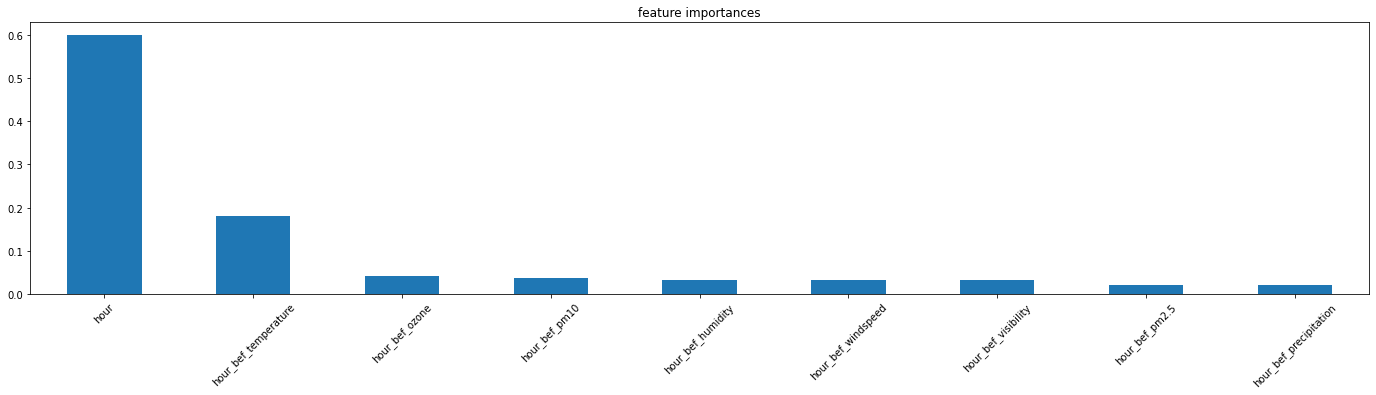

In [96]:
feature_importance = pd.Series(index=features, data=best_rg.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="feature importances", rot=0)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current

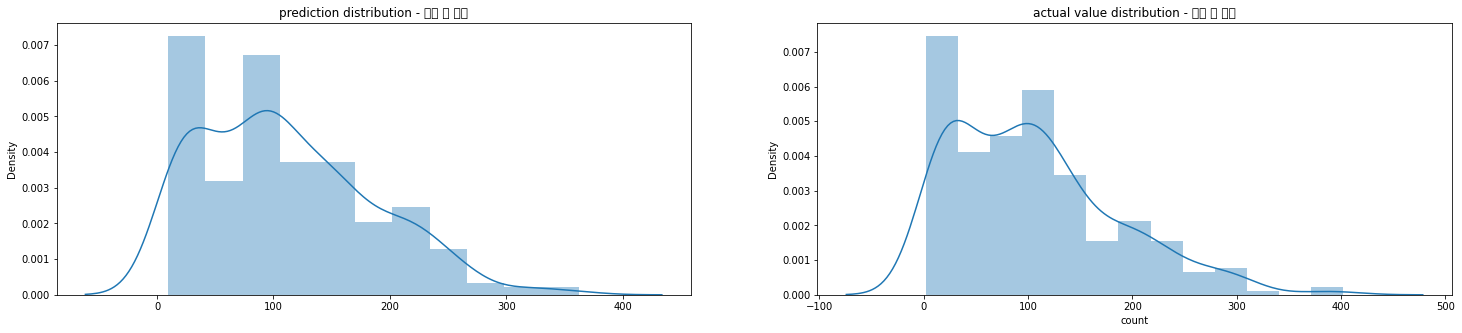

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  

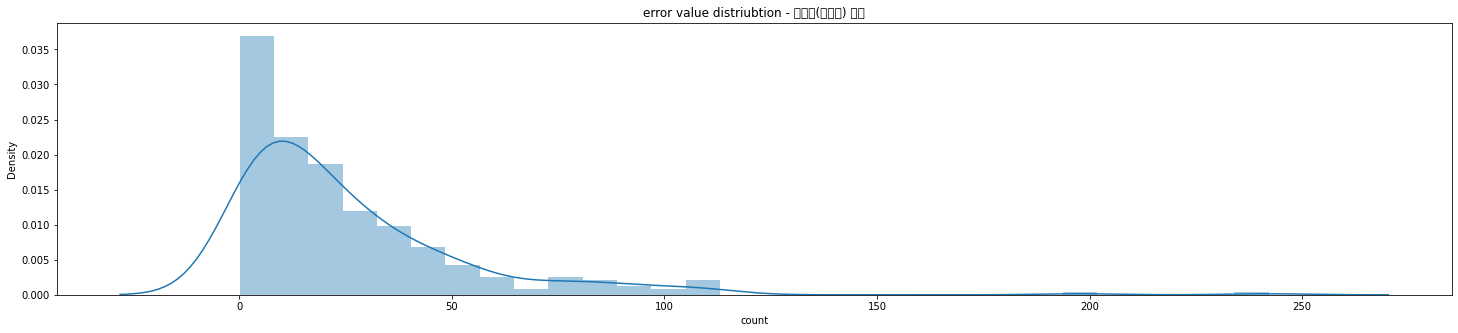

In [97]:
predictions = best_rg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("prediction distribution - 예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("actual value distribution - 실제 값 분포")
plt.show()

plt.figure(figsize=(25, 5))
sns.distplot(abs(predictions - y_test))
plt.title("error value distriubtion - 오차값(절대값) 분포")
plt.show()

## train parameter

In [99]:
"""
features=['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']

"""

X_train = train1[features]
y_train = train1['count']
X_test = test1[features]


In [100]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1)
model_400 = RandomForestRegressor(n_estimators=400, n_jobs = -1)

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
score = cross_val_score(model_100, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_200, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_300, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_400, X_train, y_train)
print(np.mean(score))


0.7861534841341887
0.7866400935189242
0.7851500363752757
0.7861144394319545


In [103]:
model_sam_2 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2)
model_sam_5 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=5)
model_sam_10 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=10)

In [104]:
score = cross_val_score(model_sam_2, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_sam_5, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_sam_10, X_train, y_train)
print(np.mean(score))

0.7838840989183034
0.783149552029154
0.7798370372820596


In [105]:
model_dep_10 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2, max_depth=10)
model_dep_11 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2, max_depth=11)
model_dep_12 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2, max_depth=12)
model_dep_13 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2, max_depth=13)
model_dep_14 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2, max_depth=14)
model_dep_15 = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2, max_depth=15)

In [106]:
score = cross_val_score(model_dep_10, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_11, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_12, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_13, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_14, X_train, y_train)
print(np.mean(score))
score = cross_val_score(model_dep_15, X_train, y_train)
print(np.mean(score))

0.782234813337677
0.7853623494326187
0.7856139834014932
0.7828467746462515
0.7840574603116154
0.7853102134236131


## train for submission

In [107]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, n_jobs = -1,  min_samples_split=2,max_depth=12)

In [108]:
X_train.shape, y_train.shape, X_test.shape

((1457, 9), (1457,), (715, 9))

In [109]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=200, n_jobs=-1)

In [110]:
submission['count'] = model.predict(X_test)

In [ ]:
submission.to_csv('따릉이data.csv', index = False)